In [1]:
# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# first used in exercise two
import pca
from sklearn import preprocessing # for scale
from sklearn.decomposition import PCA

# first used in exercise three
import coorddescent as cd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

Note: Per the request in the "Collaboration policy" note, I've discussed at least part of this assignment with many of the MS employees in the class, including Amitabh, Abhishek, Geoff, Suman, Charles, and Salik. (Different weeks/different assignments have different people, depending upon who attends our study groups, but I'll probably just include this blurb w/ each homework since it's generally correct.) I've also gotten input from the discussion board.

# Exercise One

Apologies for the large images - I haven't yet made the time to figure out how to get these to show at a better size.

## First loss function

![1a](1a.jpg)

# Second loss function

![1b](1b.jpg)

## Third loss function

![1c](1c.JPG)

# Exercise Two

*"(a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. Hint: There are a number of functions in numpy that you can use to generate data. One example is the numpy.random.normal() func- tion; numpy.random.uniform() is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes."*

(For proof of running this on AWS, see the "Running this on AWS" section below.)

I've submitted my implementation in the pca.py file. I use this implementation in this notebook - I imported the module above without an alias. In addition, I also included the single test I wrote as part of doing the implementation in the file pca-test.py. (It would be nice to have written more tests.)

A quick note: I had a hard time getting the algorithm to converge when I used very small mean shifts of 0.5 - I tried a lot of different step size value combinations and got nothing but non-convergence. I was able to get it to converge with a larger mean shift, so I'm going with that larger mean shift here.

In [3]:
mean_vals = [0, 10, 20]
np.random.seed(42)
d = pd.DataFrame(np.vstack([np.random.normal(mean, 
                        size=(20,50)) for mean in mean_vals]))
d.insert(0, 'Class', np.repeat(['A','B','C'], 20))
d[:1]

,Class,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,A,0.496714,-0.138264,0.647689,1.52303,-0.234153,-0.234137,1.579213,0.767435,-0.469474,...,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.76304


In [4]:
d_values = d.values[:, 1:51].astype('float')
d_values_centered = preprocessing.scale(d_values, with_std=False)
d_values_centered[0]

array([ -9.47652431, -10.36087989,  -9.29538686,  -8.58559277,
       -10.16925639, -10.28390443,  -8.43284888,  -9.41223556,
       -10.46780705,  -9.85403586, -10.39694444, -10.58329323,
        -9.84789351, -11.77688128, -12.0374925 , -10.61884412,
       -11.00006027,  -9.6519797 , -10.75006323, -11.58583051,
        -8.81179199, -10.29558276,  -9.91366629, -11.39948789,
       -10.70784122,  -9.85670811, -11.13090521,  -9.8084079 ,
       -10.73701623, -10.46793313, -10.56025456,  -7.99222798,
        -9.95515398, -11.09243514,  -9.20584621, -11.29344291,
        -9.73924429, -11.91219899, -11.31890736,  -9.77094352,
        -9.32654553,  -9.90398641, -10.16759232, -10.2470722 ,
       -11.37186667, -10.72705805, -10.23186415,  -8.66765149,
        -9.90986555, -11.76248424])

In [5]:
#X = faces.data
#eta_0, t_0, epoch_count = .00001, 1, 50

X = d_values
eta_0, t_0, epoch_count = 0.001, 2, 100

*"(b) Run your own normalized Oja algorithm on the 60 observations. You should try to implement the algorithm yourself, but you may look back at the labs if you need help. Plot the first two principal component score vectors. Compare your results to the ones obtained with scikit-learn’s PCA algorithm. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then you’re done and you can launch the computations on AWS. If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes."*

## First get the principal component vectors

In [6]:
pca_mine = pca.oja_fit(d_values_centered, 2, 0.001, 2, 100)
pca_mine

array([[-0.14233808, -0.14325841, -0.1412073 , -0.13801909, -0.13976854,
        -0.14364452, -0.13991588, -0.14104627, -0.14228377, -0.14028263,
        -0.13925675, -0.14082025, -0.14095172, -0.13850047, -0.14332036,
        -0.14209849, -0.13842665, -0.13647461, -0.14296221, -0.14077913,
        -0.14063061, -0.14656803, -0.13859503, -0.14020938, -0.14084308,
        -0.14367034, -0.14535419, -0.14171067, -0.14213515, -0.14140917,
        -0.14192608, -0.1424767 , -0.14370792, -0.14301991, -0.1391046 ,
        -0.14296572, -0.14035296, -0.14268456, -0.13853477, -0.14386945,
        -0.14474611, -0.13853374, -0.14457914, -0.13896496, -0.1406518 ,
        -0.14347555, -0.14219766, -0.13715138, -0.14139773, -0.14340828],
       [-0.25272171, -0.11417458, -0.05425078,  0.24955044,  0.0732108 ,
        -0.17703835,  0.06468499, -0.20463734,  0.1444755 , -0.0614932 ,
        -0.01203612,  0.17646   , -0.17187869, -0.18488356, -0.077395  ,
         0.13801135, -0.20147526, -0.37529502, -0.

In [7]:
pca_sklearn = PCA(2, svd_solver='full')
pca_sklearn.fit(X)
print(pca_sklearn.components_[0])
print(pca_sklearn.components_[1])

[-0.14233391 -0.14325963 -0.1412039  -0.13801734 -0.13977184 -0.14364433
 -0.13991273 -0.14104493 -0.14228272 -0.14028026 -0.13925715 -0.14081765
 -0.1409513  -0.13850097 -0.1433206  -0.14209824 -0.13842943 -0.13647746
 -0.14296263 -0.14078382 -0.1406264  -0.14656184 -0.13859031 -0.14020859
 -0.14084239 -0.14366725 -0.14535678 -0.14170943 -0.14213593 -0.14141145
 -0.14192793 -0.14247393 -0.14370843 -0.14302147 -0.13910328 -0.14296752
 -0.14035279 -0.14268592 -0.13854042 -0.14386981 -0.14474806 -0.13853575
 -0.14457845 -0.13896695 -0.14065459 -0.14347999 -0.1421975  -0.13715082
 -0.14139857 -0.14340664]
[-0.14820248 -0.15577997 -0.02747821  0.05217483  0.09001604  0.21697314
  0.04838229  0.0579049   0.1868853   0.07290217 -0.1472483   0.10724179
 -0.21673595 -0.23128117  0.08330134  0.00877515  0.22128086  0.03809422
  0.00873939 -0.0690226   0.24575393  0.15597047  0.08329307 -0.00890795
 -0.25341302  0.06472497 -0.00552899  0.02767339 -0.23068174 -0.2512671
  0.02564334  0.17065277  

## Then transform the data and plot

I did a lot of work to try to find a set of eta_0 and t_0 values that would enable my algorithm to give the same values for the second principal component as did sklearn. My algorithm matched sklearn - in both vectors - when I used the faces data from the lab. When I switched to my data, and when I found a different set of eta_0 and t_0 params, the first principal component vector matched sklearn, but the second did not. Given that the algorithm worked with other data, it seemed like it was just that I didn't have a good set of parameters, so I did further work to try to find them, including checking a grid of 144 possible eta_0/t_0 combinations, but in the end didn't. Interestinginly, the transformed data still clusters very well, as shown by the first plot below. (Also, I've saved some of that code below - it iterates over a grid of possible settings and prints out rows where the first component vector is what we'd expect. The second component vector though never matches sklearn.)

In [8]:
d['mine_PCA1'] = d_values_centered.dot(pca_mine[0])
d['mine_PCA2'] = d_values_centered.dot(pca_mine[1])

In [9]:
values_sklearn_PCA = pca_sklearn.transform(d_values_centered)
values_sklearn_PCA.shape

(60, 2)

In [10]:
# and add sklearn PCA values to dataframe
d['sklearn_PCA1'] = values_sklearn_PCA[:, 0]
d['sklearn_PCA2'] = values_sklearn_PCA[:, 1]

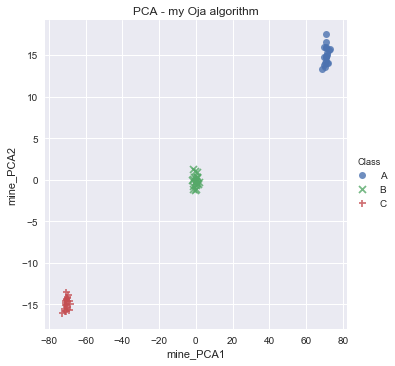

In [11]:
sns.lmplot("mine_PCA1", "mine_PCA2", hue="Class", 
           markers=["o","x","+"], data=d, fit_reg=False)
sns.plt.title("PCA - my Oja algorithm")

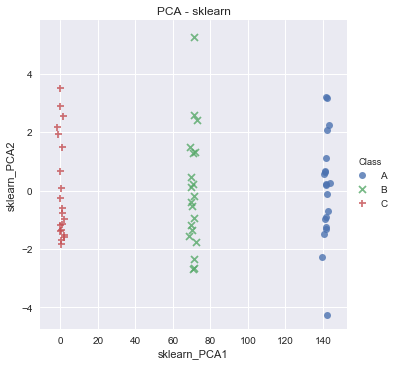

In [12]:
sns.lmplot("sklearn_PCA1", "sklearn_PCA2", hue="Class", 
           markers=["o","x","+"], data=d, fit_reg=False)
sns.plt.title("PCA - sklearn")

In [13]:
# See text above for what this is.
# Z = X - np.mean(X, axis=0)  # center the data

# epoch_count = 250
# low_thresh = 0.139
# high_thresh = 0.145

# for eta_0 in [10**k for k in range(-12, 5)]:
#     for t_0 in [10**k for k in range(-12, 5)]:
#         print("eta_0: {}, t_0: {}".format(eta_0, t_0))
#         for i in range(0,3):
#             a_0 = np.random.randn(np.size(Z, 1))  # starting point
#             a_0 /= np.linalg.norm(a_0, axis=0)
#             v1, _ = pca.oja(copy.deepcopy(Z), a_0, eta_0, t_0, epoch_count)

#             Z1 = pca.deflate(Z, v1)
#             v2, _ = pca.oja(copy.deepcopy(Z1), a_0, eta_0, t_0, epoch_count)

#             if np.all((np.abs(v1[:3]) > low_thresh) & (np.abs(v1[:3]) < high_thresh)):
#                 print("{} - {}".format(v1[:3], v2[:3]))

# Exercise Three

(For proof of running this on AWS, see the "Running this on AWS" section below.)

*"(a) Use the numpy.random.normal() function to generate a predictor X of length n = 100, as well as a noise vector ε of length n = 100."*

In [14]:
X = np.random.normal(size=100)
e = np.random.normal(size=100)
(X.shape, e.shape)

((100,), (100,))

*"(b) Generate a response vector Y of length n = 100 according to the model Y =β0 +β1X+β2X2 +β3X3 +ε,
where β0, β1, β2, and β3 are constants of your choice. Here superscripts denote powers of X."*

I'm just choosing some coefficients.

In [15]:
b0 = 27
b1 = 11
b2 = 5
b3 = 3

In [16]:
y = b0 + (b1*X) + (b2*(X**2)) + (b3*(X**3)) + e
y.shape

(100,)

In [17]:
# and we'll make X a 100,1 array rather than a vector,
# for better use w/ sklearn functions
X = X[:, np.newaxis]
X.shape

(100, 1)

And we'll scale X and center y. 

In [18]:
X_scaled = preprocessing.scale(X)
y_centered = preprocessing.scale(y, with_std=False)

*"(c) Now fit a LASSO model to the simulated data using your own coordinate descent algorithm. Use X, X2, . . . , X10 as predictors. Set λ = 1."*

Note that I found with lambda = 1 that I didn't get close convergence for all coefficients: although some of the higher coefficients had numbers didn't jump around a huge amount, they did jump around some. That said, the lower coefficients - the first four - stayed pretty constant (and the fifth and six were zeroed out by the algorithm). (This held regardless of whether I bumped up the iterations to something like 5000.)

I also tried this with both my implementation from last week and Corinne's implementation from the solution. I've submitted this code the coorddescent.py file, which I've imported above with the alias 'cp'. The results below show that my code and Corinne's code produce very similar results. 

In [19]:
X_scaled_poly10 = PolynomialFeatures(degree=10, 
                                     include_bias=False).fit_transform(X_scaled)
X_scaled_poly10.shape

(100, 10)

In [20]:
n = np.size(X_scaled_poly10, 0)
beta_init = np.zeros(np.size(X_scaled_poly10, 1))
max_iter = 1000

In [21]:
cd.corinne_randcoorddescent(beta_init, X_scaled_poly10, 
                            y_centered, 1, max_iter)[-1, :]

array([  1.00206638e+01,  -3.46535914e+00,   1.60101394e+00,
         2.82673285e+00,   1.87887556e-01,  -1.78634303e-01,
        -1.24684823e-02,  -4.24782856e-02,  -1.27254052e-03,
         3.41085364e-03])

In [22]:
cd.get_final_coefs(cd.andrew_randcoorddescent(X_scaled_poly10, 
                                              y_centered, 1, max_iter))

array([  1.02850203e+01,  -1.57202355e+00,   1.31567363e+00,
         1.08663073e+00,   1.91930809e-01,   1.21593226e-01,
         1.98756607e-02,   2.49515374e-03,  -5.84254909e-03,
        -6.54806461e-03])

*"(d) Select the optimal value of λ on a held-out validation set using your own coordinate descent algorithm. Create plots of the error on the validation set as a function of λ for your own coordinate descent algorithm and scikit-learn’s LASSO algorithm; use different colors for the two curves. Discuss the results obtained.*

I ran the sklearn code, my code, and Corinne's code, and plotted the results vs. MSE below. My results and Corinne's results are very similar; sklearn's are similar up to about a lambda of 1 or 0.1, where they start increasing first. Generally all of implementations have relatively good results with low values of lambda, and then do worse when lambda increases.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_poly10, 
                                                    y_centered, 
                                                    test_size=0.25, 
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 10), (25, 10), (75,), (25,))

In [24]:
def mse_from_beta_coefs(beta_coefs, X, y):
    return mean_squared_error(y, X.dot(beta_coefs))

In [25]:
lambdas = [10**k for k in range(-8, 5)]
lambdas

[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [26]:
def mse_for_lambda_corinneimpl(lam, X_train, X_test, y_train, y_test):
    beta_init = np.zeros(np.size(X_train, 1))
    betas_rand = cd.corinne_randcoorddescent(beta_init, X_train, 
                                             y_train, lam, max_iter)
    return(mse_from_beta_coefs(betas_rand[-1, :], X_test, y_test))

mses_corinneimpl = [mse_for_lambda_corinneimpl(lam, 
                                               X_train, 
                                               X_test, 
                                               y_train, 
                                               y_test) for lam in lambdas]
list(zip(lambdas, mses_corinneimpl))

[(1e-08, 6.1542335396561159),
 (1e-07, 6.5621911191573634),
 (1e-06, 6.2200686088235297),
 (1e-05, 6.0422474865899289),
 (0.0001, 6.4401706785296788),
 (0.001, 6.3453905792382193),
 (0.01, 6.3180430420894345),
 (0.1, 6.6787946847618445),
 (1, 6.6287539785602441),
 (10, 7.0054426120935958),
 (100, 10.934190456880128),
 (1000, 55.695714364316402),
 (10000, 84.496204577152881)]

In [27]:
def mse_for_lambda_andrewimpl(lam, X_train, X_test, y_train, y_test):
    betas_rand = cd.andrew_randcoorddescent(X_train, 
                                            y_train, lam, 
                                            max_iter)
    return(mse_from_beta_coefs(cd.get_final_coefs(betas_rand), 
                               X_test, y_test))

mses_andrewimpl = [mse_for_lambda_andrewimpl(lam, X_train, 
                                             X_test, y_train, 
                                             y_test) for lam in lambdas]
list(zip(lambdas, mses_andrewimpl))

[(1e-08, 6.2232772869954127),
 (1e-07, 6.5853987623403585),
 (1e-06, 6.6009447096904363),
 (1e-05, 6.5189967526714732),
 (0.0001, 7.8739048905381628),
 (0.001, 7.1345406320075293),
 (0.01, 7.3467806015741761),
 (0.1, 6.6646262549945119),
 (1, 6.5723327555193256),
 (10, 8.0302720870707223),
 (100, 10.789568824186484),
 (1000, 56.154172942920312),
 (10000, 84.496204577152881)]

In [28]:
def mse_for_lambda_sklearn(lam, X_train, X_test, y_train, y_test):
    results = Lasso(alpha=lam, fit_intercept=False, 
                    max_iter=10000000).fit(X_train, y_train)
    return(mse_from_beta_coefs(results.coef_, X_test, y_test))

mses_sklearn = [mse_for_lambda_sklearn(lam, X_train, 
                                       X_test, y_train, 
                                       y_test) for lam in lambdas]
list(zip(lambdas, mses_sklearn))

# Side note: there's opportunity for reducing duplication - we have 
# three functions that really do thesame thing - likely by injecting 
# the function that gets the coefs; I won't worry about that now, 
# though it bugs me to leave it this way :-)

[(1e-08, 4.9305273944384362),
 (1e-07, 4.9305254594260024),
 (1e-06, 4.930506110931578),
 (1e-05, 4.930312797427848),
 (0.0001, 4.9283967978902297),
 (0.001, 4.9109478761437853),
 (0.01, 5.0619695414328483),
 (0.1, 7.2352067384078218),
 (1, 13.247445306209954),
 (10, 66.28411617550772),
 (100, 89.858044243518549),
 (1000, 94.537667918941608),
 (10000, 107.8089734870248)]

In [29]:
mses = pd.DataFrame({'Corinne': mses_corinneimpl,
                     'Andrew': mses_andrewimpl,
                     'Sklearn': mses_sklearn}, index=lambdas)
mses

,Andrew,Corinne,Sklearn
1.000000e-08,6.223277,6.154234,4.930527
1.000000e-07,6.585399,6.562191,4.930525
1.000000e-06,6.600945,6.220069,4.930506
1.000000e-05,6.518997,6.042247,4.930313
1.000000e-04,7.873905,6.440171,4.928397
1.000000e-03,7.134541,6.345391,4.910948
1.000000e-02,7.346781,6.318043,5.061970
1.000000e-01,6.664626,6.678795,7.235207
1.000000e+00,6.572333,6.628754,13.247445
1.000000e+01,8.030272,7.005443,66.284116


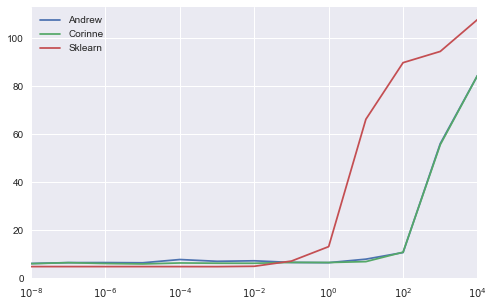

In [30]:
mses.plot(logx=True) 

*"(e) Now generate a response vector Y according to the model Y = β0 + β7X7 + ε. Fit a LASSO model using your own coordinate descent algorithm and scikit-learn’s LASSO algorithm. Discuss the results obtained."*

I generated coefficients from three sets of code: my code, Corinne's code, and sklearn's code. None of them are the same or even similar. The MSE using the optimal coefficents from the three sets of code isn't super different, so it could be that all three solutions are satisfactory in the sense of minimizing the error. With the chosen value of lambda, both my and Corinne's implementation didn't zero out any coefficients; the sklearn solution zeroed out three coefficients. Given that the objective function used by sklearn is different from the function used by my and Corinne's code it could be that I'd need to use a different higher value of lambda to get zeroed coefficients with my and Corinne's code.

In [31]:
b7 = 12
new_y = b0 + (b7*(X[:,0]**7)) + e
print(new_y.shape)

(100,)


In [32]:
new_y_centered = preprocessing.scale(new_y, with_std=False)
np.mean(new_y_centered), np.std(new_y_centered)

(-2.4158453015843408e-15, 329.86034718203467)

In [33]:
# setting lambda to the highest value that gave low MSEs for both
# my implementation and sklearn
optimal_lambda = 1 

beta_init = np.zeros(np.size(X_scaled_poly10, 1))
betas_rand = cd.corinne_randcoorddescent(beta_init, 
                                         X_scaled_poly10, 
                                         new_y_centered, 
                                         optimal_lambda, 
                                         max_iter)
print(betas_rand[-1,:])
print(mse_from_beta_coefs(betas_rand[-1, :], 
                          X_scaled_poly10, new_y_centered))

[ -8.26887186e-02   2.09775416e+01  -5.07363544e-02  -1.02886281e+01
   2.14844263e-01   9.35683926e-02   5.53385425e+00  -8.70509179e-02
  -1.09942531e-02  -8.97736726e-04]
43.7163071258


In [34]:
betas_rand = cd.andrew_randcoorddescent(X_scaled_poly10, new_y_centered, 
                                        optimal_lambda, max_iter)
print(cd.get_final_coefs(betas_rand))
print(mse_from_beta_coefs(cd.get_final_coefs(betas_rand), 
                          X_scaled_poly10, new_y_centered))

[ -1.32638439e+01   1.43130592e+01   1.57757186e+01  -5.05695499e+00
   3.62515847e-01  -8.96094314e-01   3.19777786e+00  -3.64098684e-02
   3.42888148e-01  -4.34981012e-03]
71.7610822729


In [35]:
results_sklearn = Lasso(alpha=optimal_lambda, fit_intercept=False, 
                        max_iter=10000000).fit(X_scaled_poly10, 
                                               new_y_centered)
print(results_sklearn.coef_)
print(mse_from_beta_coefs(results_sklearn.coef_, X_scaled_poly10, 
                          new_y_centered))

[  0.00000000e+00   7.83107360e+00   0.00000000e+00  -0.00000000e+00
   2.13438720e-01  -1.94139195e+00   5.48410073e+00  -1.01908482e-01
  -1.72211062e-03   2.16746747e-02]
59.2349011805


# Exercise Four

This week I finally made progress on the Kaggle competition.

* I worked with multiple different types of AMIs and in the end was able to get things to work (I think, and so far) with the 1.3 version of the Deep Learning AMI. 
* I formatted the code from the https://www.kernix.com/blog/image-classification-with-a-pre-trained-deep-neural-network_p11 blog post correctly, got it checked into my private Data 558 GitHub repo, and cloned the repo on my EC2 instance. 
* Then, with the help of the info at https://www.tensorflow.org/tutorials/image_recognition and on StackOverflow, I cloned the TensorFlow models repo to get the ImageNet download/creation code, and successfully ran the classify_image.py code to download and set up the trained model.
* Now, as of the time of writing, when trying to run the images_to_features.py code, I'm getting an error from TensorFlow when it tries to load the graph ('google.protobuf.message.DecodeError: Truncated message'). I'll continue to work on it.

# Exercise Five

At this point I don't have anything additional to add over what I wrote last week - please refer there if needed. 

# Running this on AWS

My approach for running the code on AWS was to try to keep the code itself the same, and, as needed, change configuration/things outside the code. Since the thing I'm going to turn in is a Jupyter notebook, I wanted to load and run the same notebook file on AWS, by running 'jupyter notebook' like I do locally, and then connect to that instance of the notebook server - which is just an HTTP server - from my local machine. So, I'd be viewing the notebook through the same browser that I normally use, but the code would actually be running on the EC2 instance.

To make this work, initially I tried to set up the notebook server so that it was accessible via the instance's public IP. I followed the instructions at https://chrisalbon.com/jupyter/run_project_jupyter_on_amazon_ec2.html. I couldn't get this to work - I didn't do much troubleshooting, as I also had the option described in the next paragraph, which worked.

As an alternative that did work, I used SSH tunneling. I started the Jupyter notebook server on the EC2 instance so that it was running completely local to the EC2 instance - I didn't use or need any of the configuration steps described in the article in the previous paragraph. Then I ran a single command on my local machine that set up an SSH tunnel between my local machine and the EC2 instance. While this tunnel was up, everything I sent to localhost:8157 on my local machine - i.e., when I used Safari to retrieve the URL 'http://localhost:8157' - was automatically packaged up and sent to port 8888 on the EC2 instance. Since the Jupyter notebook server on EC2 was running on port 8888, it got the requests from my local browser, ran the requested Python code, and sent back the results. I read more about a similar approach at http://www.datasciencebytes.com/bytes/2015/12/18/using-jupyter-notebooks-securely-on-remote-linux-machines/.

The command I ran on my local machine to set up the tunnel was:

`ssh -i /path/to/ssh/key -NL 8157:localhost:8888 ubuntu@remote-machine-public-dns`

I've pasted in below screen shots of code for both exercises two and three. Note that since the browser thinks the server is local, the address bar shows 'localhost' - to the browser the tunnel is transparent, so this is expected. I've pointed out some differences in the formatting - likely caused by differences in versions that I have local and that exist on EC2 - as one way to show further that these are actually different.

## Exercise two on AWS

If you compare the format of the data frame output in this screen shot to the format above, you can see that they're different.

![1c](OnAWS2.png)

## Exercise three on AWS

As was the case with the previous screen shot, the formatting of the data frame is different on AWS - shown below - than it is when I run it locally on a Mac (above). In addition, you can see a difference in the way matplotlib rendered the legend in the graphic below, on AWS, compared to how it rendered it above.

![1c](OnAWS1.png)